## Problem Statement

As a data analyst at a retail consultancy firm, a client of mine, a supermarket chain, is looking to enhance its marketing strategies and customer engagement to boost sales and customer loyalty.  
The client wants to understand their customers' purchasing behavior, preferences, and factors influencing their shopping decisions. The goal is to tailor marketing campaigns more effectively and improve product placement and promotions.

## Data

To solve the given problem, I will use the company's data to answer some questions that would lead to a better understanding about the situation and determine the solution based on data-driven decisions.  

Below are the company's data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
main_df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df = main_df.copy()
pd.options.display.max_columns = None
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Attributes

**People**
- ID: Customer's unique identifier 
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

## Data Undestanding and Cleaning

Before diving into the analysis, it's crucial to gain a better understanding of the data and ensure it is prepared for analysis. Let's take a closer look about the data, such as the df shape & types, duplicates, missing values, unique values, and descriptive statistics.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Checking for duplicates
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

There are no duplicates in the DataFrame.


In [5]:
# Missing values counts and proportion
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    result = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
    result = result[(result != 0).any(axis=1)]
    print('Total missing values and its proportion:')
    return result
missing_data(df)

Total missing values and its proportion:


,Total,Percentage
Income,24,1.071429


In [6]:
# Checking the number of unique values present in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Descriptive statistics
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [8]:
#Checking categorical values
display(df['Education'].value_counts(),
        df['Marital_Status'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Observations summary:

- The dataset has 2240 rows and 29 columns, providing a comprehensive view of customer demographics, spending habits, and interactions with marketing campaigns.
- The columns `Z_CostContact` and `Z_Revenue` contain constant values across all observations. They are unlikely to contribute meaningful insights during the analysis due to their lack of variability.
- The `Dt_Customer` column are the customers's date of enrollment with the company, but the data type is object. This is need to be converted to datetime format so time-series analysis would be applicable if needed.
- There are no duplicates in the dataset.
- All columns are filled with values except `Income` column, where missing values present
- There are 24 missing values in which is at `Income` column
- The proportion of the `Income` column missing values is 1.07%, which is considered small.
- Several values in categorical data needs a simplification, such as:  
    - '2n Cycle' is equivalent to 'Master'<sup>[1]</sup>  
    - 'Together' is equivalent to 'Married'  
    - Simplify 'Alone', 'Absurd', 'YOLO' to 'Single'

### Missing Values, Outliers, Anomalies, Engineering Features

The missing value is present on the `Income` column. Since `Income` is correlated with `Education` and `Age`<sup>[2],[3]</sup>, estimating the missing values by imputation through their correlation is applicable. Therefore, I will perform imputation for the missing values by using the representative average of income, based on education group by age group. For the age group, I will use an increment of 10 years per age group to get a better estimation of the representative average<sup>[5]</sup>.  

The next step will be correcting data type and engineering some beneficial  features which are listed below:  
- Correct `Dt_Customer`'s data type into 'datetime' format
- Extract the `Age` of a customer by the `Year_Birth` indicating the birth year of the respective person.
- Categorize the `Age_Group` out of `Age` column
- Categorize the `Income_Class` out of `Income` column<sup>[6]</sup>
- Create a feature `Register_Age` indicating the number of years since the customer's registration date
- Create another feature `Spent` indicating the total amount spent by the customer in various categories over the span of two years.
- Create a feature `Children` to indicate total children in a household that is, kids and teenagers.
- Create another feature `Living_With` out of `Marital_Status` to extract the living situation of couples.
- To get further clarity of household, creating feature indicating `Family_Size`.
- Create a feature `Is_Parent` to indicate parenthood status.
- Merge '2n Cycle' and 'Master' in `Education` and 'Alone', 'Absurd', 'YOLO' to 'Single' in `Marital_Status` and merge 'Together' with 'Married'
- Rename some columns and values for clarity
- Drop redundant features

In [9]:
# Correcting 'Dt_Customer' data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.dtypes['Dt_Customer']

dtype('<M8[ns]')

In [10]:
# Feature Engineering
# Age of the customer 
df["Age"] = 2021 - df["Year_Birth"] #Asuming the data was collected in 2021

# Feature register age indicating number of years since registration date
df['Register_Age'] = df['Dt_Customer'].apply(lambda x: relativedelta(pd.to_datetime('2021-01-01'), x).years)

# Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Renaming categorical data in "Marital_Status"
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "YOLO":"Single", "Alone":"Single",})

# Feature indicating total children living in the household
df["Children"] = df["Kidhome"]+df["Teenhome"]

# Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

# Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# Renaming categorical data in "Education"
df["Education"] = df["Education"].replace({"2n Cycle":"Master", "Graduation":"Bachelor"})

#For clarity
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Dropping some of the redundant features
to_drop = ["Living_With", "Year_Birth", "Z_CostContact","Z_Revenue"]
df = df.drop(to_drop, axis=1)

To better estimate the missing values in the `Income` column by its correlation with `Education` and `Age`, it is better to handle outliers first. Given the company's aim to understand its customers' diverse needs and preferences, identifying accurate trends and patterns is crucial. Outliers can potentially skew this analysis. Therefore, let's examine the outliers more closely to determine the most suitable method for addressing them.

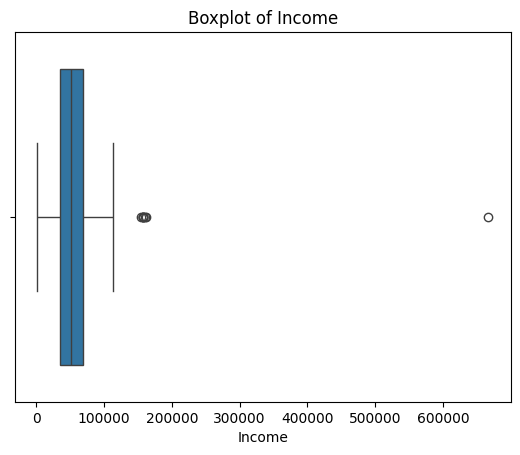

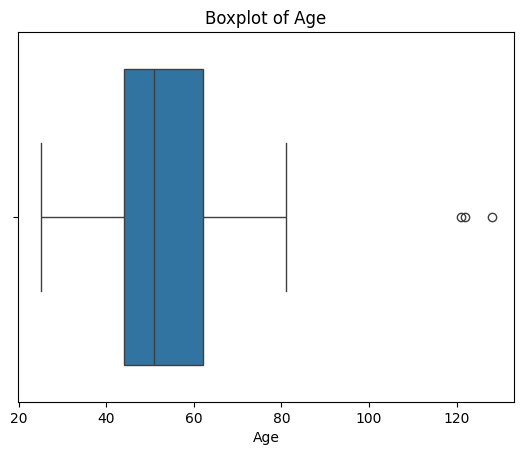

,Column,Outliers Proportion (%)
0,Income,0.36
1,Age,0.13


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Register_Age,Spent,Children,Family_Size,Is_Parent
655,5555,Bachelor,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,46,6,6,0,1,0
2132,11181,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,72,7,8,0,2,0
1653,4931,Bachelor,Married,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,44,7,1730,0,2,0
164,8475,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,48,6,1608,1,3,1
1300,5336,Master,Married,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,50,7,59,1,3,1
687,1501,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,39,8,1717,0,2,0
617,1503,PhD,Married,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,45,7,107,2,4,1
2233,9432,Bachelor,Married,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,44,7,62,1,3,1


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Register_Age,Spent,Children,Family_Size,Is_Parent
192,7829,Master,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,121,7,65,1,2,1
339,1150,PhD,Married,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,122,7,1853,0,2,0
239,11004,Master,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,128,6,22,1,2,1


In [11]:
# Function to calculate and return outliers, as well as lower and upper bounds
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Visualize and calculate outliers for 'Income'
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

outliers_income, _, _ = calculate_outliers(df, 'Income')

# Visualize and calculate outliers for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

outliers_age, _, _ = calculate_outliers(df, 'Age')

# Calculate proportions
outliers_proportion = pd.DataFrame({
    'Column': ['Income', 'Age'],
    'Outliers Proportion (%)': [
        len(outliers_income) / len(df) * 100, 
        len(outliers_age) / len(df) * 100
    ]
})

# Format the proportions to 2 decimal places
outliers_proportion['Outliers Proportion (%)'] = outliers_proportion['Outliers Proportion (%)'].round(2)
display(outliers_proportion, outliers_income.sort_values('Income'),outliers_age.sort_values('Age'))


- The box plot reveals several data points beyond the upper whisker, indicating the presence of outliers at the higher end of the income and age spectra.
- The existence of these high-income outliers may suggest the presence of a customer segment with significantly greater purchasing power.
- However, the presence of these high-age outliers is likely erroneous. According to the reference provided, there is only one documented case of a person living past 120 years old, and that individual passed away in 1997<sup>[4]</sup>. Therefore, these outliers should be removed.
- Since the proportion of income outliers is very small and does not represent a significant customer segment, I have chosen to exclude them from the analysis to ensure a more generalized approach.

In [12]:
# Removing outliers
df = df.drop(outliers_age.index)
df = df.drop(outliers_income.index)
df.shape

(2229, 32)

For the next step, let's check the `Income` value distribution to determine the type of distribution.

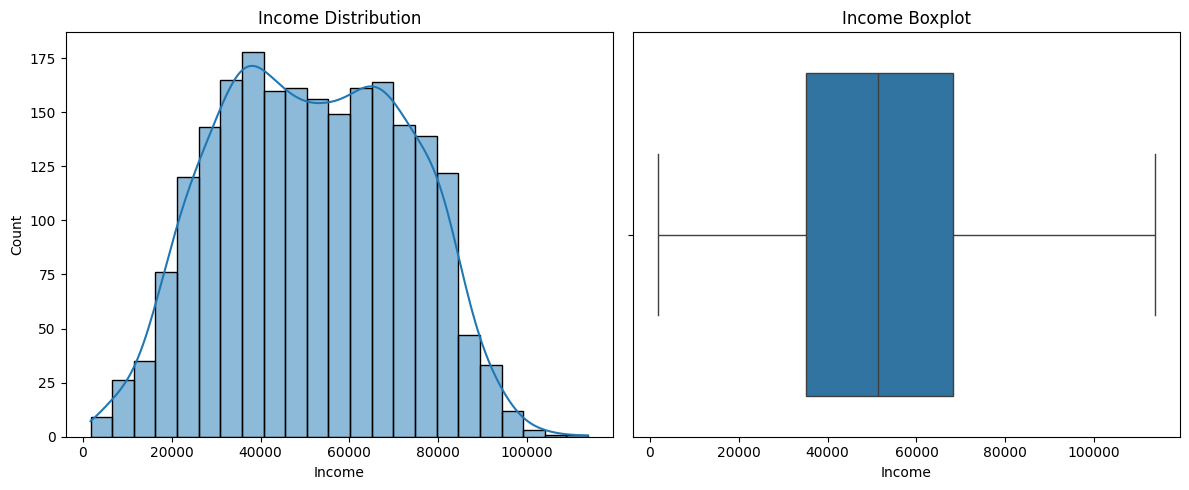


Shapiro-Wilk Test for Income:
Test Statistic: nan
P-value: 1.0
The 'Income' column is normally distributed (p >= 0.05).


In [13]:
# Visualize the distribution of 'Income'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')

# Perform the Shapiro-Wilk test for 'Income'
shapiro_income, p_income = stats.shapiro(df['Income'])
plt.subplot(1, 2, 2)
sns.boxplot(x='Income', data=df)
plt.title('Income Boxplot')

plt.tight_layout()
plt.show()

# Check if 'Income' follows a normal distribution based on the Shapiro-Wilk test
print("\nShapiro-Wilk Test for Income:")
print(f"Test Statistic: {shapiro_income}")
print(f"P-value: {p_income}")

if p_income < 0.05:
    print("The 'Income' column is not normally distributed (p < 0.05).")
else:
    print("The 'Income' column is normally distributed (p >= 0.05).")

Now that the outliers has been handled and the `Income` value is normally distributed, let's address the missing values.

In [14]:
# Getting the index of rows with missing value
miss_index = df[df.isna().any(axis=1)].index.to_list()

In [15]:
# Creating age groups with a range of 10 years each
df['Age_Group'] = pd.cut(df['Age'], bins=range(df['Age'].min(), df['Age'].max() + 10, 10), right=False)

# Calculating the mean of salary per age group, grouped by their education
mean_salary_per_age_group = df.groupby(['Education', 'Age_Group'])['Income'].mean().reset_index()
mean_salary_per_age_group

,Education,Age_Group,Income
0,Bachelor,"[25, 35)",49781.785714
1,Bachelor,"[35, 45)",47842.444898
2,Bachelor,"[45, 55)",49693.873239
3,Bachelor,"[55, 65)",55678.063025
4,Bachelor,"[65, 75)",57860.342541
5,Bachelor,"[75, 85)",58970.600000
6,Basic,"[25, 35)",17943.307692
7,Basic,"[35, 45)",21673.950000
8,Basic,"[45, 55)",18393.400000
9,Basic,"[55, 65)",22174.000000


In [16]:
# Identifying missing values in the "Income" column
missing_salary = df[df['Income'].isnull()]

# Filling missing values based on the mean salary of the corresponding age group and education level
for index, row in missing_salary.iterrows():
    age_group = row['Age_Group']
    education = row['Education']
    mean_salary = mean_salary_per_age_group[(mean_salary_per_age_group['Education'] == education) & 
                                            (mean_salary_per_age_group['Age_Group'] == age_group)]['Income'].values
    if len(mean_salary) > 0:
        df.at[index, 'Income'] = mean_salary[0]

# Dropping 'Age_Group'
df = df.drop('Age_Group', axis=1)

# Define the age thresholds and labels for segmentation
age_thresholds = [18, 35, 54, float('inf')]
age_labels = ['Young Adult', 'Middle-Aged Adult', 'Senior']

# Feature age segment based on age segmentation
df['Age_Group'] = pd.cut(df['Age'], bins=age_thresholds, labels=age_labels, right=False)

# Define the income thresholds and labels for segmentation
income_thresholds = [0, 28007, 55000, 89744, float('inf')]
income_labels = ['Lower', 'Lower-Middle', 'Middle', 'Upper-Middle']

# Feature income class based on income segmentation
df['Income_Class'] = pd.cut(df['Income'], bins=income_thresholds, labels=income_labels, right=False)

# Re-arranging the columns position to my preference
df = df[['ID', 'Education', 'Age', 'Age_Group', 'Income', 'Income_Class', 'Marital_Status', 'Register_Age', 'Dt_Customer', 'Recency', 
       'Spent', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'Kidhome', 'Teenhome', 'Children', 'Family_Size', 'Is_Parent',
       'Complain', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']]

In [17]:
df.loc[miss_index][['Education','Income','Age']].sort_values(['Education','Age'])

,Education,Income,Age
312,Bachelor,49781.785714,32
27,Bachelor,47842.444898,35
10,Bachelor,47842.444898,38
58,Bachelor,47842.444898,39
2078,Bachelor,49693.873239,50
319,Bachelor,49693.873239,51
133,Bachelor,55678.063025,58
1382,Bachelor,55678.063025,63
91,Bachelor,55678.063025,64
2081,Bachelor,57860.342541,66


In [18]:
df.isna().any()

ID                     False
Education              False
Age                    False
Age_Group              False
Income                 False
Income_Class           False
Marital_Status         False
Register_Age           False
Dt_Customer            False
Recency                False
Spent                  False
Wines                  False
Fruits                 False
Meat                   False
Fish                   False
Sweets                 False
Gold                   False
Kidhome                False
Teenhome               False
Children               False
Family_Size            False
Is_Parent              False
Complain               False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp1           False
AcceptedCmp2           False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
Response               False
dtype: bool

In [19]:
# Checking the current dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Education            2229 non-null   object        
 2   Age                  2229 non-null   int64         
 3   Age_Group            2229 non-null   category      
 4   Income               2229 non-null   float64       
 5   Income_Class         2229 non-null   category      
 6   Marital_Status       2229 non-null   object        
 7   Register_Age         2229 non-null   int64         
 8   Dt_Customer          2229 non-null   datetime64[ns]
 9   Recency              2229 non-null   int64         
 10  Spent                2229 non-null   int64         
 11  Wines                2229 non-null   int64         
 12  Fruits               2229 non-null   int64         
 13  Meat                 2229 non-nul

In [20]:
df.head()

,ID,Education,Age,Age_Group,Income,Income_Class,Marital_Status,Register_Age,Dt_Customer,Recency,Spent,Wines,Fruits,Meat,Fish,Sweets,Gold,Kidhome,Teenhome,Children,Family_Size,Is_Parent,Complain,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,Bachelor,64,Senior,58138.0,Middle,Single,8,2012-09-04,58,1617,635,88,546,172,88,88,0,0,0,1,0,0,3,8,10,4,7,0,0,0,0,0,1
1,2174,Bachelor,67,Senior,46344.0,Lower-Middle,Single,6,2014-03-08,38,27,11,1,6,2,1,6,1,1,2,3,1,0,2,1,1,2,5,0,0,0,0,0,0
2,4141,Bachelor,56,Senior,71613.0,Middle,Married,7,2013-08-21,26,776,426,49,127,111,21,42,0,0,0,2,0,0,1,8,2,10,4,0,0,0,0,0,0
3,6182,Bachelor,37,Middle-Aged Adult,26646.0,Lower,Married,6,2014-02-10,26,53,11,4,20,10,3,5,1,0,1,3,1,0,2,2,0,4,6,0,0,0,0,0,0
4,5324,PhD,40,Middle-Aged Adult,58293.0,Middle,Married,6,2014-01-19,94,422,173,43,118,46,27,15,1,0,1,3,1,0,5,5,3,6,5,0,0,0,0,0,0


In [21]:
df.columns

Index(['ID', 'Education', 'Age', 'Age_Group', 'Income', 'Income_Class',
       'Marital_Status', 'Register_Age', 'Dt_Customer', 'Recency', 'Spent',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Kidhome',
       'Teenhome', 'Children', 'Family_Size', 'Is_Parent', 'Complain',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Response'],
      dtype='object')

In [22]:
df.describe()

,ID,Age,Income,Register_Age,Recency,Spent,Wines,Fruits,Meat,Fish,Sweets,Gold,Kidhome,Teenhome,Children,Family_Size,Is_Parent,Complain,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,52.111261,51630.841802,6.975774,49.106326,605.541050,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,0.444594,0.507402,0.951996,2.596231,0.716016,0.008973,2.319874,4.100045,2.636608,5.812472,5.334231,0.064603,0.013459,0.073127,0.074921,0.072678,0.149843
std,3244.840538,11.707430,20608.269982,0.685412,28.946476,601.032228,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,0.538636,0.544735,0.751976,0.907432,0.451030,0.094319,1.895252,2.775461,2.796161,3.242144,2.414981,0.245879,0.115255,0.260403,0.263324,0.259666,0.356998
min,0.000000,25.000000,1730.000000,6.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.000000,44.000000,35416.000000,7.000000,24.000000,69.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,51.000000,51315.000000,7.000000,49.000000,397.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8420.000000,62.000000,68118.000000,7.000000,74.000000,1044.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,81.000000,113734.000000,8.000000,99.000000,2525.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2.000000,2.000000,3.000000,5.000000,1.000000,1.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


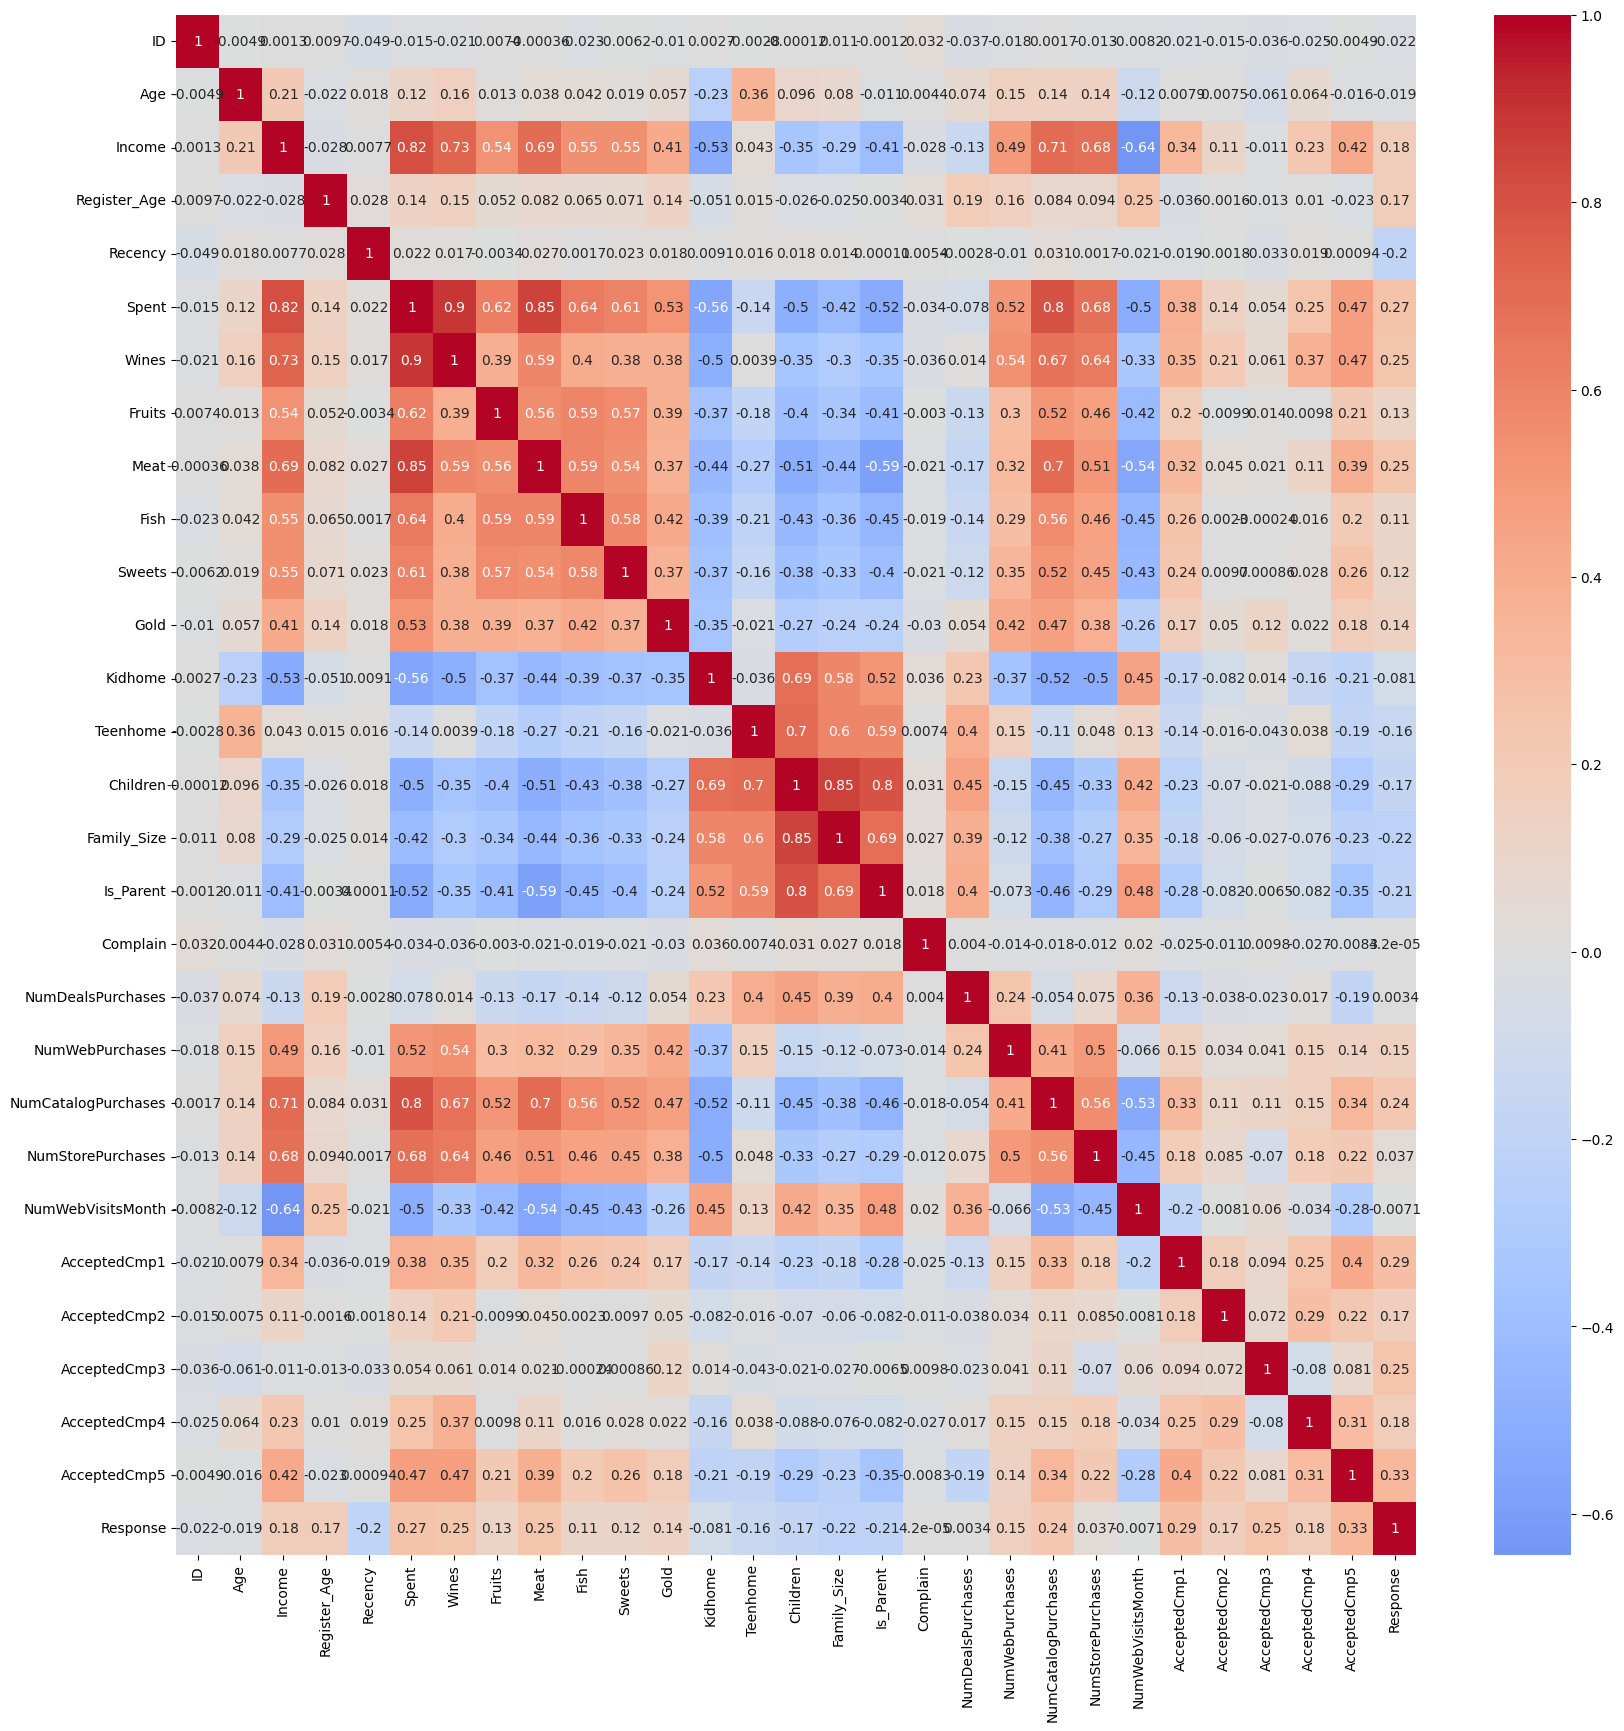

In [23]:
#correlation matrix
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',center=0)
plt.show()

The dataset, initially comprising various attributes of supermarket customers, has undergone extensive preparation for in-depth analysis. I've addressed missing values in the `Income` column through imputation strategy based on customers' education and age. Feature engineering has enriched the dataset with insightful attributes like `Age`, `Age_Group`, `Register_Age`, `Income_Class`, `Spent`, `Living_With`, and `Family_Size`. I've removed irrelevant columns and outliers, particularly in `Income` and `Age`, to ensure data quality. The dataset is now primed for detailed analysis to unearth key insights for targeted marketing strategies.

## Data Analysis

The goal of this analysis is to tailor marketing campaigns more effectively and improve product placement and promotion. Therefore, I need to understand the customers' purchasing behavior, preferences, and factors influencing their shopping decisions. To get to that, these are the questions that I want to answer:  
- How can customers be segmented based on their demographics and purchasing behavior?
- What are the preferred products among different customer segments?
- Which marketing campaigns were most effective and with which customer segments?
- What trends can be predicted about future customer behavior?

Let's start with the Customer Segmentation Analysis by exploring the relationship between demographic variables and total spending

In [24]:
# Descriptive statistics
display(df.describe(), df.describe(include=['object','category']))

,ID,Age,Income,Register_Age,Recency,Spent,Wines,Fruits,Meat,Fish,Sweets,Gold,Kidhome,Teenhome,Children,Family_Size,Is_Parent,Complain,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,52.111261,51630.841802,6.975774,49.106326,605.541050,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,0.444594,0.507402,0.951996,2.596231,0.716016,0.008973,2.319874,4.100045,2.636608,5.812472,5.334231,0.064603,0.013459,0.073127,0.074921,0.072678,0.149843
std,3244.840538,11.707430,20608.269982,0.685412,28.946476,601.032228,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,0.538636,0.544735,0.751976,0.907432,0.451030,0.094319,1.895252,2.775461,2.796161,3.242144,2.414981,0.245879,0.115255,0.260403,0.263324,0.259666,0.356998
min,0.000000,25.000000,1730.000000,6.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.000000,44.000000,35416.000000,7.000000,24.000000,69.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,51.000000,51315.000000,7.000000,49.000000,397.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8420.000000,62.000000,68118.000000,7.000000,74.000000,1044.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,81.000000,113734.000000,8.000000,99.000000,2525.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2.000000,2.000000,3.000000,5.000000,1.000000,1.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Education,Age_Group,Income_Class,Marital_Status
count,2229,2229,2229,2229
unique,4,3,4,4
top,Bachelor,Middle-Aged Adult,Middle,Married
freq,1124,1132,948,1436


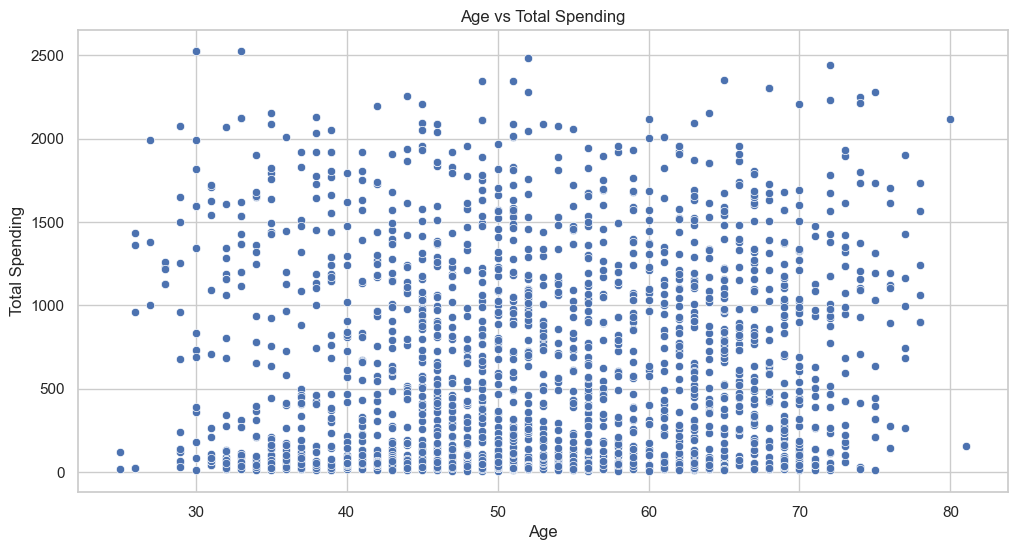

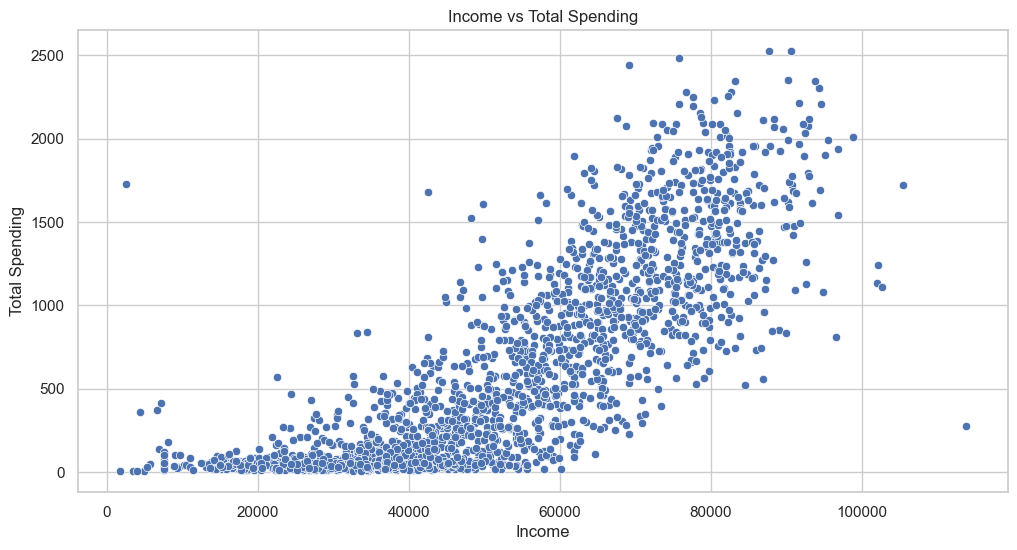

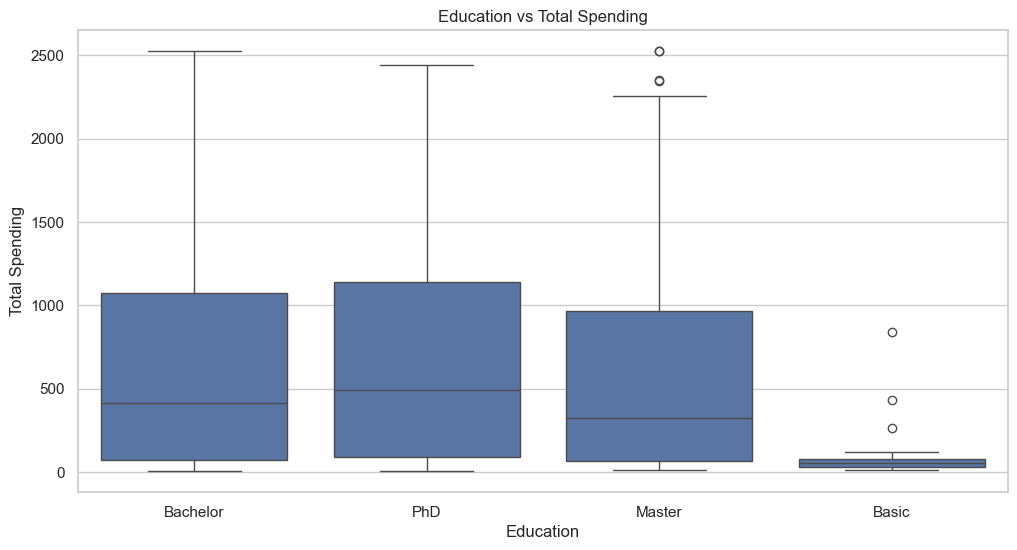

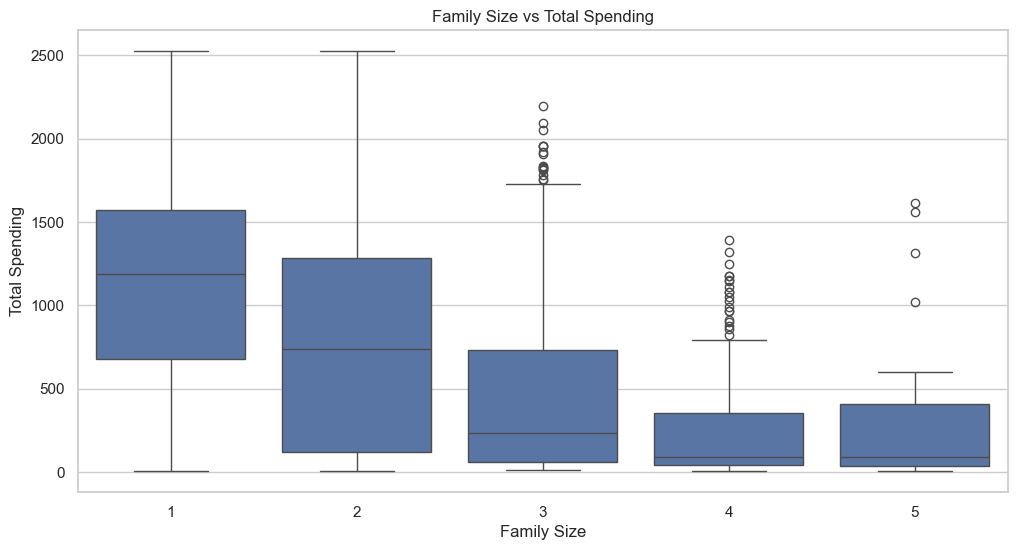

In [25]:
# Setting plot style
sns.set(style="whitegrid")

# Scatter plot for Age vs Total Spending
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Spent',data=df)
plt.title('Age vs Total Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()

# Scatter plot for Income vs Total Spending
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Income', y='Spent', data=df)
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

# Boxplot for Education vs Total Spending
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Spent', data=df)
plt.title('Education vs Total Spending')
plt.xlabel('Education')
plt.ylabel('Total Spending')
plt.show()

# Boxplot for Family Size vs Total Spending
plt.figure(figsize=(12, 6))
sns.boxplot(x='Family_Size', y='Spent', data=df)
plt.title('Family Size vs Total Spending')
plt.xlabel('Family Size')
plt.ylabel('Total Spending')
plt.show()



- Age vs Total Spending  
There's a wide distribution of total spending across different ages. However, there doesn't appear to be a strong correlation between age and total spending, as spending is quite varied across all age groups.

- Income vs Total Spending  
There is a more noticeable trend here. As income increases, total spending also tends to increase, indicating a positive correlation. This suggests that higher-income customers are likely to spend more.

- Education vs Total Spending  
The boxplot shows some variation in spending across different education levels. However, the differences are not stark. It suggests that while education might play a role in spending habits, it is not the most significant factor.

- Family Size vs Total Spending  
Interestingly, family size shows a varied impact on total spending. Larger families do not necessarily spend more than smaller families. This could indicate that family size alone is not a decisive factor in predicting spending.

I want to understand customer preferences for different product categories and how these preferences vary across different customer segments by answering these questions:  
- Which product categories have the highest spending?
- Is there a correlation between spending in different product categories and customer demographics like age, income, and family size?

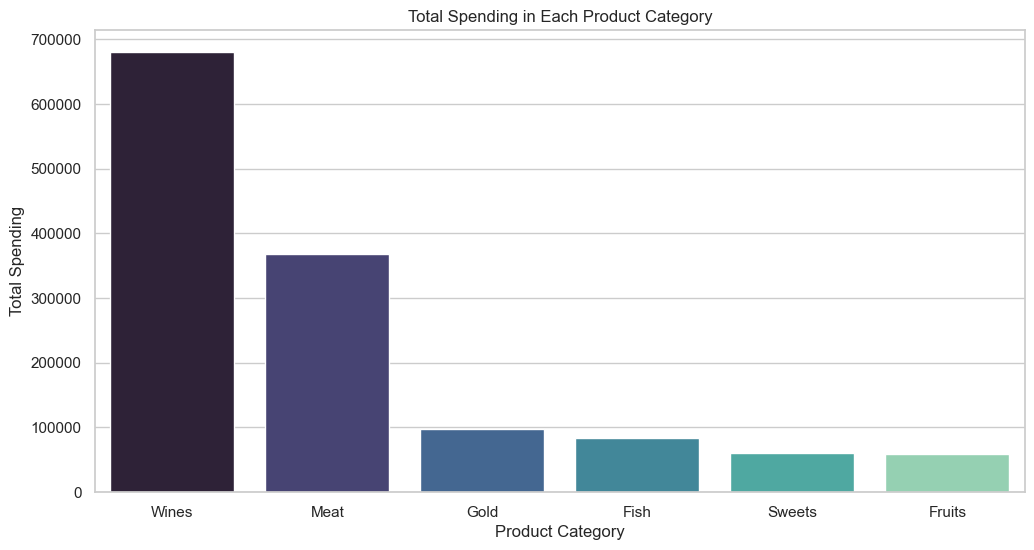

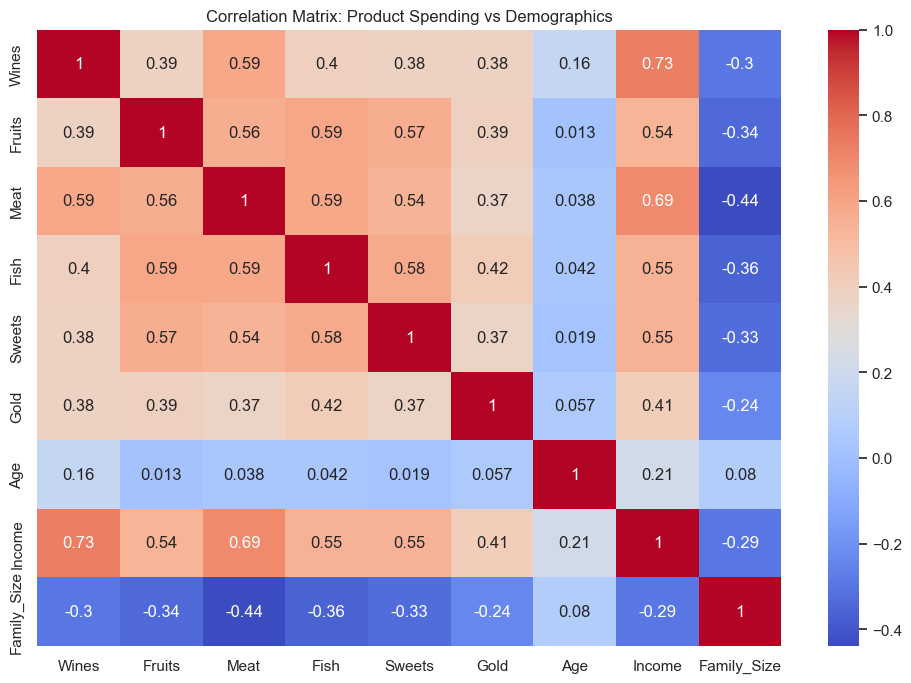

In [26]:
# Selecting product categories for analysis
product_categories = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Creating a dataframe for product spending
product_spending = df[product_categories]

# Plotting the total spending in each product category
total_product_spending = product_spending.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=total_product_spending.index, y=total_product_spending.values, palette='mako')
plt.title('Total Spending in Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

# Correlation matrix of spending in product categories and key demographics (Age, Income, Family Size)
demographics = ['Age', 'Income', 'Family_Size']
correlation_matrix = df[product_categories + demographics].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Product Spending vs Demographics')
plt.show()


Total Spending in Each Product Category  
- Wines: The highest spending is on wines, indicating a strong preference for this category among the supermarket's customers.
- Meat and Gold: The next significant spending is on meat and gold.
- Fruits, Fish, and Sweets: These categories have comparatively lower spending, suggesting they are less popular or less prioritized by the customers.

Correlation Matrix: Product Spending vs Demographics  
- Income Correlation: There is a strong positive correlation between income and spending on most product categories, especially wines, meat, and gold. This indicates that as customer income increases, their spending in these categories also increases.
- Age Correlation: Age shows a moderate positive correlation with spending on wines and a negative correlation with spending on sweets. This suggests older customers tend to spend more on wines, while younger customers might prefer sweets.
- Family Size Correlation: There's a negative correlation between family size and spending on wines, and a positive correlation with spending on meats. This might indicate that larger families prioritize spending on basic necessities like meat over luxury items like wine.

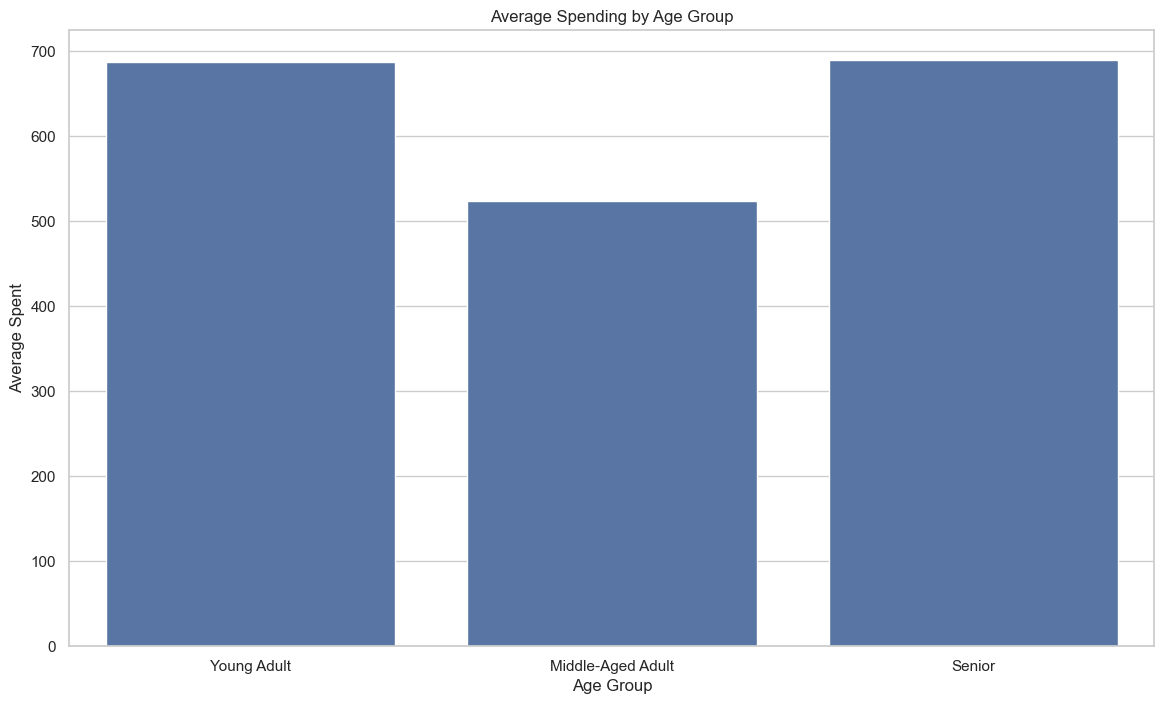

,Age_Group,Spent,Wines,Fruits,Meat,Fish,Sweets,Gold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Young Adult,686.911565,293.312925,35.285714,230.870748,45.850340,33.346939,48.244898,3.353741,3.006803,5.829932,5.020408
1,Middle-Aged Adult,524.024735,256.637809,23.903710,144.363074,34.097173,25.029152,39.993816,3.851590,2.196113,5.384276,5.696113
2,Senior,690.083158,364.415789,27.878947,180.064211,40.596842,28.745263,48.382105,4.511579,3.104211,6.320000,4.951579


In [27]:
# Grouping data by Age_Group to analyze purchasing behavior and preferences
age_group_analysis = df.groupby('Age_Group').agg({
    'Spent': 'mean', 
    'Wines': 'mean', 
    'Fruits': 'mean', 
    'Meat': 'mean', 
    'Fish': 'mean', 
    'Sweets': 'mean', 
    'Gold': 'mean', 
    'NumWebPurchases': 'mean', 
    'NumCatalogPurchases': 'mean', 
    'NumStorePurchases': 'mean',
    'NumWebVisitsMonth': 'mean'
}).reset_index()


# Creating a visualization for the purchasing behavior by age group
plt.figure(figsize=(14, 8))
sns.barplot(x='Age_Group', y='Spent', data=age_group_analysis)
plt.title('Average Spending by Age Group')
plt.ylabel('Average Spent')
plt.xlabel('Age Group')
plt.show()

# Display the summarized data for further analysis and insights
age_group_analysis


- Spending Habits by Age Group:  
        Senior: Highest average spending ($690.08), with a strong preference for wines ($364.42 average spent) and meats ($180.06 average spent).  
        Young Adult: Similar average spending to seniors ($686.91), but with a more diverse spending pattern, notably higher on meats ($230.87 average spent) and sweets ($33.35 average spent).  
        Middle-Aged Adult: Lower average spending ($524.02) compared to other groups, with a balanced expenditure across categories.  

- Purchasing Channels:  
        Senior: More inclined towards catalog purchases (average 3.10) and store purchases (average 6.32), indicating a preference for traditional shopping channels.  
        Young Adult: Higher engagement in web purchases (average 3.35) and catalog purchases (average 3.01), suggesting a blend of online and traditional shopping preferences.  
        Middle-Aged Adult: Moderate engagement across all channels, with a slightly higher frequency of web visits (average 5.70).  

- Product Preferences:  
        Senior: High expenditure on wines and meats, indicating a preference for premium products.  
        Young Adult: More varied preferences, with notable spending on meats, sweets, and fish.  
        Middle-Aged Adult: More conservative spending, with no significant preference for any specific product category.  

To evaluate the effectiveness of marketing campaigns and identify which customer segments responded most positively, these are the questions that I need to answer:  
- Which marketing campaigns had the highest acceptance rates?
- Is there a correlation between acceptance of marketing campaigns and customer demographics or spending patterns?

Let's analyze the response rates of the marketing campaigns and correlate them with customer demographics and their spending habits.

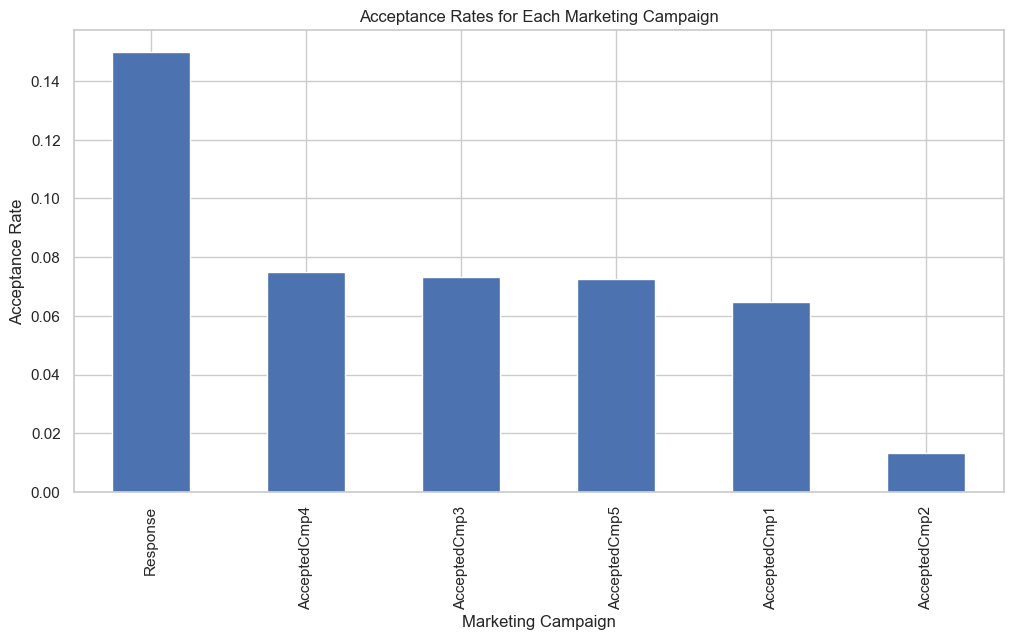

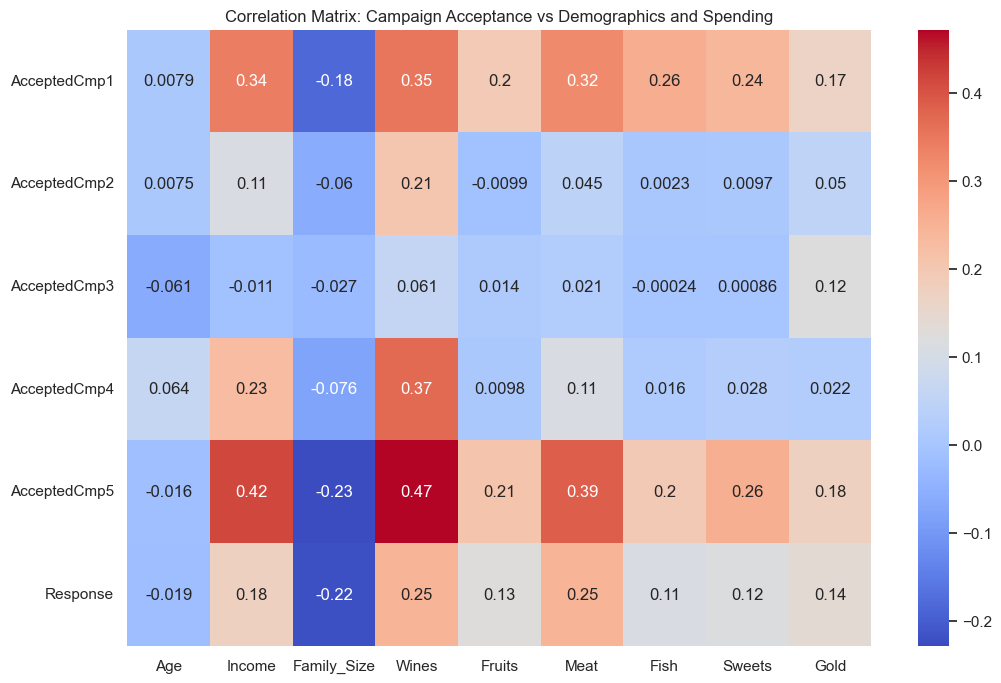

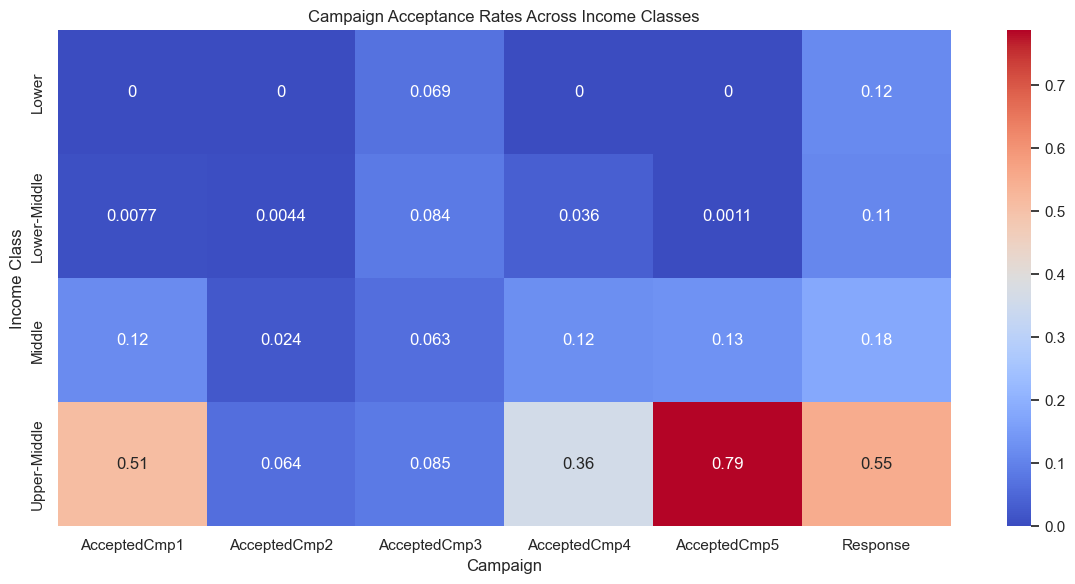

In [28]:
# Selecting marketing campaign columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calculating acceptance rates for each campaign
campaign_acceptance_rates = df[campaign_columns].mean().sort_values(ascending=False)

# Plotting the acceptance rates for each marketing campaign
plt.figure(figsize=(12, 6))
campaign_acceptance_rates.plot(kind='bar')
plt.title('Acceptance Rates for Each Marketing Campaign')
plt.xlabel('Marketing Campaign')
plt.ylabel('Acceptance Rate')
plt.show()

# Correlation matrix of campaign acceptance and key demographics and spending
correlation_matrix_campaigns = df[campaign_columns + demographics + product_categories].corr()

# Focusing on correlations between campaigns and other variables
campaign_correlations = correlation_matrix_campaigns.loc[campaign_columns, demographics + product_categories]

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(campaign_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Campaign Acceptance vs Demographics and Spending')
plt.show()

# Correlation matrix for campaign acceptance vs Income Class
campaign_acceptance = df.groupby('Income_Class')[campaign_columns].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(campaign_acceptance, annot=True, cmap='coolwarm')
plt.title('Campaign Acceptance Rates Across Income Classes')
plt.ylabel('Income Class')
plt.xlabel('Campaign')
plt.tight_layout()
plt.show()


Acceptance Rates for Each Marketing Campaign
- The bar chart shows varying acceptance rates across different marketing campaigns. The "Response" column, which represents the response to the last campaign, has the highest acceptance rate, indicating its relative success compared to earlier campaigns.
- Other campaigns have lower acceptance rates, with some showing significantly lower rates. This suggests a need to evaluate the strategies used in these campaigns.

Correlation Matrix: Campaign Acceptance vs Demographics and Spending
- Demographics Correlation:
    - Income shows a positive correlation with several campaigns, indicating higher-income customers are more likely to respond to campaigns.
    - Age shows varying correlations, suggesting different age groups respond differently to different campaigns.
- Product Spending Correlation:
    - Spending on wines, meats, and gold shows positive correlations with campaign acceptance. This suggests customers who spend more on these categories are more likely to respond positively to campaigns.
    - Other categories like fruits, fish, and sweets have weaker correlations.

Based on the analyses, these are the insights and recommendations:  

Target High-Spenders in Wines and Meats: Given their significant spending, tailored promotions and loyalty programs for these categories can be effective.
- Implement targeted promotions such as exclusive deals or limited-time offers on wines and meats for customers identified as high spenders in these categories.
- Develop a specialized loyalty program for wines and meats, offering rewards like custom tastings, or exclusive access to new products. 

Focus on Higher-Income Segments for Campaigns: As they show a higher likelihood of responding to marketing efforts.  
- Segment the customer database based on income levels and design marketing campaigns specifically for higher-income groups.
- Use personalized marketing techniques like tailored emails or exclusive event invitations to engage these segments.  

Age-Specific Marketing Strategies: Different age groups have different preferences and response patterns. Tailoring campaigns to these differences can improve effectiveness.
- Analyze purchase history and preferences by age group to understand their unique needs and preferences.
- Design loyalty programs tailored to each age group, focusing on their specific preferences. For instance, loyalty rewards on wine purchases for seniors, diverse rewards for young adults, and value-based rewards for middle-aged adults.  

Evaluate Less Successful Campaigns: Understand why certain campaigns had lower acceptance rates and refine the approach.
- Conduct a detailed analysis of past campaigns that had lower acceptance rates to identify gaps or issues, such as targeting, messaging, or channel selection.
- Implement A/B testing for new campaigns to compare different strategies and refine approaches based on real-time feedback.

Predictive Trend Analysis: Monitor spending patterns and campaign responses to predict future trends and adjust strategies accordingly.  
- Use data analytics tools to track and analyze current spending patterns and past campaign responses.
- Develop a predictive model to forecast future trends and customer behaviors, enabling proactive adjustments in marketing and inventory management.

Conclusion

By leveraging these insights, the supermarket can enhance its marketing strategies, cater to the specific needs of different customer segments, and ultimately improve sales and customer satisfaction.

## References

1. https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/#;h23  
2. https://taxfoundation.org/data/all/federal/average-income-age/
3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9222779/ 
4. https://www.prb.org/resources/age-100-and-counting/#:~:text=The%20oldest%20known%20age%20ever,limit%20of%20the%20human%20lifespan  
5. https://www.advisorperspectives.com/dshort/updates/2023/09/12/median-household-incomes-by-age-bracket-1967-2022
6. https://www.fool.com/the-ascent/personal-finance/articles/does-your-income-make-you-upper-class-middle-class-or-lower-class/